In [246]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:\\Users\\ggiorcelli\\Downloads\\train.csv')
print("Number of records: ",len(df))
print("\nSample Record:")
df.head(1)

Number of records:  891

Sample Record:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [247]:
print("Data types:")
df.dtypes

Data types:


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [134]:
#Checking for missing records
print("Value Counts: ")
df.count()

Value Counts: 


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [248]:
#Ticket and cabin are irrelevant and with a lot of Nas so I'll drop them
df.drop(['Ticket','Cabin'],axis=1, inplace=True)
#Passenger id and name are also irrelevant
df.drop(['PassengerId','Name'],axis=1, inplace=True)

In [136]:
df.count()

Survived    891
Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
Fare        891
Embarked    889
dtype: int64

In [249]:
#It looks like Age has a few NAs. I'll replace the missing values with the mean age for the corresponding class and gender
df.Age = df.Age.fillna(-1)
df1 = df.replace(-1, df.groupby(['Sex','Pclass'], as_index=False)['Age'].mean())

In [250]:
df1.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,19.055965,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [251]:
#Two people did not embark so I'll remove their records from the data
df1 = df1.dropna()

print("Value Counts:")
df1.count()

Value Counts:


Survived    889
Pclass      889
Sex         889
Age         889
SibSp       889
Parch       889
Fare        889
Embarked    889
dtype: int64

Survival rate by class and sex


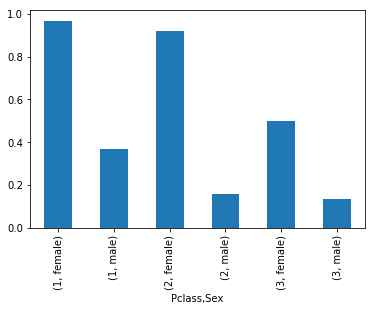

Survival rate by age bucket


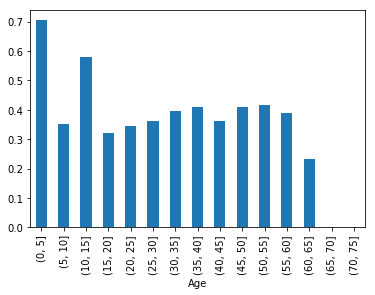

In [113]:
#Quick exploratory analysis on survivial rate
import matplotlib.pyplot as plt

print("Survival rate by class and sex")
(df1.groupby(['Pclass','Sex'])['Survived'].mean()).plot.bar()
plt.show()

print("Survival rate by age bucket")
(df1.groupby(pd.cut(df1["Age"], np.arange(0, df1.Age.max(), 5)))['Survived'].mean()).plot.bar()
plt.show()

In [252]:
#Creating dummy variables for sex and embarked
df1 = pd.get_dummies(data=df1, columns=['Sex','Embarked','Pclass'])

#dropping male flag
df1.drop("Sex_male",axis=1,inplace=True)

In [253]:
df1.head(20)  #Train set looks good

,Survived,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.000000,1,0,7.2500,0,0,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,1,0,0,1,0,0
2,1,26.000000,0,0,7.9250,1,0,0,1,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,1,1,0,0
4,0,35.000000,0,0,8.0500,0,0,0,1,0,0,1
5,0,19.055965,0,0,8.4583,0,0,1,0,0,0,1
6,0,54.000000,0,0,51.8625,0,0,0,1,1,0,0
7,0,2.000000,3,1,21.0750,0,0,0,1,0,0,1
8,1,27.000000,0,2,11.1333,1,0,0,1,0,0,1
9,1,14.000000,1,0,30.0708,1,1,0,0,0,1,0


In [163]:
#Check for NAs
np.isnan(df1).any()

Survived      False
Age           False
SibSp         False
Parch         False
Fare          False
Sex_female    False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
Pclass_1      False
Pclass_2      False
Pclass_3      False
dtype: bool

In [254]:
#Importing and preparing test dataset
test_df = pd.read_csv('C:\\Users\\ggiorcelli\\Downloads\\train.csv')
test_df.drop(['Ticket','Cabin','PassengerId','Name'],axis=1, inplace=True)

#Note: I'm replacing missing age with mean age for corresponding class and sex from train dataset to ensure normalization
test_df.Age = test_df.Age.fillna(-1)
test_df1 = test_df.replace(-1, df.groupby(['Sex','Pclass'], as_index=False)['Age'].mean())

#Create dummies and drop male flag
test_df1 = pd.get_dummies(data=test_df1, columns=['Sex','Embarked','Pclass'])
test_df1.drop('Sex_male',axis=1,inplace=True)

In [255]:
#Renaming test and train for easier coding
train_x, train_y = df1.iloc[:,1:], df1.iloc[:,0]
test_x, test_y = test_df1.iloc[:,1:], test_df1.iloc[:,0]

#Library import
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score

In [169]:
#Create model
model = LogisticRegression()
model = model.fit(train_x, train_y)

yhat = model.predict(test_x)

#Calculating chi2 to get pvalues
scores, pvalues = chi2(train_x, train_y) 
pvalues=["{0:.4f}".format(x)for x in pvalues] 

p_val = pd.DataFrame(list(zip(train_x.columns, np.transpose(model.coef_),  np.transpose(pvalues))) ,columns=['variable','coeff','p_val']).sort_values(by='p_val',ascending=True)
p_val['p_val'] = p_val['p_val'].astype(float)

#Check the accuracy on the training and test set
print("accuracy on train: ", model.score(train_x, train_y))
print("accuracy on test: ",  model.score(test_x, test_y))
print("recall: ",recall_score(test_y, yhat))
print("")
print("Confusion matrix")
print(metrics.confusion_matrix(test_y, yhat))
print("")
print(p_val.loc[p_val['p_val'] < 0.01].sort_values(by='coeff',ascending=False))

accuracy on train:  0.804274465692
accuracy on test:  0.804713804714
recall:  0.701754385965

Confusion matrix
[[477  72]
 [102 240]]

      variable               coeff   p_val
4   Sex_female     [2.59635168667]  0.0000
8     Pclass_1     [0.94105921114]  0.0000
5   Embarked_C    [0.173526489211]  0.0000
3         Fare  [0.00267104603955]  0.0000
0          Age  [-0.0342128269295]  0.0000
2        Parch  [-0.0793257414616]  0.0012
10    Pclass_3     [-1.0636214137]  0.0000


In [196]:
#Now let's see if we can improve the accuracy by normalizing age and fare
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(train_x[['Age','Fare']])
train_x[['Age','Fare']] = scaler.transform(train_x[['Age','Fare']])
test_x[['Age','Fare']] = scaler.transform(test_x[['Age','Fare']])

#Create model with standardized variables
model = LogisticRegression()
model = model.fit(train_x, train_y)

yhat = model.predict(test_x)

#Check the accuracy on the training and test set
print("accuracy on train: ", model.score(train_x, train_y))
print("accuracy on test: ",  model.score(test_x, test_y))
print("recall: ",recall_score(test_y, yhat))
print("")
print("Confusion matrix")
print(metrics.confusion_matrix(test_y, yhat))
print("")

accuracy on train:  0.805399325084
accuracy on test:  0.805836139169
recall:  0.704678362573

Confusion matrix
[[477  72]
 [101 241]]



In [256]:
#Small but noticeable improvement in performance using the standard scaler
#Now I'll try one more technique: log transformation

train_x.Age, train_x.Fare = np.log(train_x.Age.loc[train_x.Age != 0]), np.log(train_x.Fare.loc[train_x.Fare != 0])
test_x.Age, test_x.Fare = np.log(test_x.Age.loc[test_x.Age != 0]), np.log(test_x.Fare.loc[test_x.Fare != 0])

#One record throws an NA after log transformation so I'll replace it it with the column mean
train_x.Fare = train_x.Fare.fillna(train_x.Fare.mean())
test_x.Fare = test_x.Fare.fillna(test_x.Fare.mean())

model = LogisticRegression()
model = model.fit(train_x, train_y)

yhat = model.predict(test_x)

#Check the accuracy on the training and test set
print("accuracy on train: ", model.score(train_x, train_y))
print("accuracy on test: ",  model.score(test_x, test_y))
print("recall: ",recall_score(test_y, yhat))
print("")
print("Confusion matrix")
print(metrics.confusion_matrix(test_y, yhat))
print("")

accuracy on train:  0.81214848144
accuracy on test:  0.812570145903
recall:  0.710526315789

Confusion matrix
[[481  68]
 [ 99 243]]



In [ ]:
## Conclusion: the best normalization technique for modeling is the one with log normalization


-----------------------------
ROC Score:  0.863835362541
-----------------------------



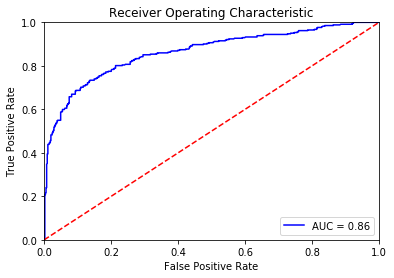

In [236]:
## Calculate and plot ROC
phat = model.predict_proba(test_x)[:,1]
print("\n-----------------------------")
print("ROC Score: ",metrics.roc_auc_score(test_y, phat))
print("-----------------------------\n")

fpr, tpr, threshold = metrics.roc_curve(test_y, phat)
roc_auc = metrics.auc(fpr, tpr)

#Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [237]:
from sklearn.metrics import classification_report
print("Classification report\n")
print(classification_report(test_y, yhat))

Classification report

             precision    recall  f1-score   support

          0       0.83      0.88      0.85       549
          1       0.78      0.71      0.74       342

avg / total       0.81      0.81      0.81       891



In [ ]:
## Now that we have proven that log-transforming the data is the optimal data processing method /
## we'll feed the data to a stroger alogorithm. General domain knowledge tells us that tree-based models / 
## are usually the best models for binary classification. Hence, once we import the data into Weka and Orange for /
## the modeling part of this project, we will probably use a tree based model.
## Before doing so, let's see how a basic extreme gradient boosting alorithm performs on the data and let's /
## see if there's is more room for improvement before taking the data into Weka or Orange

In [9]:
import sys
import sklearn
import os
import itertools
import time
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import cross_validation, metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

C:\Users\ggiorcelli\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [221]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model = xgb.XGBClassifier(scale_pos_weight=1, n_estimators=10000, learning_rate=0.1)
model.fit(train_x, train_y)

yhat = model.predict(test_x)

#Check the accuracy on the training and test set
print("accuracy on train: ", model.score(train_x, train_y))
print("accuracy on test: ",  model.score(test_x, test_y))
print("recall: ",recall_score(test_y, yhat))
print("")
print("Confusion matrix")
print(metrics.confusion_matrix(test_y, yhat))
print("")

accuracy on train:  0.985376827897
accuracy on test:  0.985409652076
recall:  0.973684210526

Confusion matrix
[[545   4]
 [  9 333]]



In [222]:
print("Classification report\n")
print(classification_report(test_y, yhat))

Classification report

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       549
          1       0.99      0.97      0.98       342

avg / total       0.99      0.99      0.99       891



In [ ]:
## As expected, a tree-base model (XGboost in this case) performs much better than logistic regression. 
## This proves our hypotesis, we will use a tree based model for the modeling part

## Before exporting the data we have one last thing left to try.
## Let's see if clustering the data before fitting the model improves our model's performance

In [223]:
## Our dataset is a mix of continuous and boolean variables so we will need to use an algorithm that / 
## tollerate such datset. DBscan is a density-based clustering algorithm that works well with data of mixed types

from sklearn.cluster import DBSCAN
clust = DBSCAN(eps=0.8, min_samples=20).fit(train_x)

train_x['Cluster'] = clust.labels_
test_x['Cluster'] = clust.fit_predict(test_x)

train_x = pd.get_dummies(data=train_x, columns=['Cluster'])
test_x = pd.get_dummies(data=test_x, columns=['Cluster'])

In [224]:
model = xgb.XGBClassifier(scale_pos_weight=1.0, n_estimators=9000, learning_rate=0.1)
model.fit(train_x, train_y)

yhat = model.predict(test_x)

#Check the accuracy on the training and test set
print("accuracy on train: ", model.score(train_x, train_y))
print("accuracy on test: ",  model.score(test_x, test_y))
print("recall: ",recall_score(test_y, yhat))
print("")
print("Confusion matrix")
print(metrics.confusion_matrix(test_y, yhat))
print("")

accuracy on train:  0.985376827897
accuracy on test:  0.985409652076
recall:  0.988304093567

Confusion matrix
[[540   9]
 [  4 338]]



In [225]:
print("Classification report\n")
print(classification_report(test_y, yhat))

Classification report

             precision    recall  f1-score   support

          0       0.99      0.98      0.99       549
          1       0.97      0.99      0.98       342

avg / total       0.99      0.99      0.99       891



In [ ]:
## We can see how recall increased but precision decreased proportionally and the f1 score remained the same. This tells us  / 
##that clustering the data does not improve the model's performance. We will not include clustering in the modeling portion

In [261]:
## Exporting log-transformed data into a csv file for modeling in Weka

train_x['Survived'] = train_y.copy()
test_x['Survived'] = test_y.copy()

processed_df = train_x.append(test_x)
processed_df.to_csv('processed_df.csv')